# Predicting MLB Salaries

## Exploratory Data Analysis

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import math

Import the batting and salary data.

In [108]:
batting = pd.DataFrame.from_csv('Batting.csv')
pitching = pd.DataFrame.from_csv('Pitching.csv')
salaries = pd.DataFrame.from_csv('Salaries.csv')

In [107]:
batting.head()

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [110]:
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [109]:
pitching.head()

,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,,,,
bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [111]:
pitching.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,44963.000000,...,30388.000000,44830.000000,44405.000000,44963.000000,44724.000000,44830.000000,44963.000000,12063.000000,12063.000000,12061.000000
mean,1968.670062,1.079643,4.715744,4.715722,23.681761,9.485488,3.151035,0.448591,1.504793,253.872139,...,2.411379,2.528575,2.266096,0.301604,343.312181,6.345260,43.021773,2.141922,1.878388,5.322610
std,37.569499,0.284834,5.813410,4.988846,18.493488,12.283920,7.081844,1.109742,4.991518,257.330446,...,2.772648,3.425706,2.998881,0.755523,348.758261,9.993949,43.245812,2.710191,2.121352,5.990178
min,1871.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1941.000000,1.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,49.000000,...,0.000000,0.000000,0.000000,0.000000,64.000000,0.000000,11.000000,0.000000,0.000000,1.000000
50%,1978.000000,1.000000,2.000000,3.000000,21.000000,3.000000,0.000000,0.000000,0.000000,167.000000,...,2.000000,1.000000,1.000000,0.000000,227.000000,3.000000,28.000000,1.000000,1.000000,3.000000
75%,2001.000000,1.000000,7.000000,8.000000,35.000000,17.000000,3.000000,0.000000,1.000000,393.000000,...,4.000000,4.000000,3.000000,0.000000,535.000000,8.000000,67.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,59.000000,48.000000,106.000000,75.000000,75.000000,16.000000,62.000000,2040.000000,...,23.000000,63.000000,41.000000,16.000000,2906.000000,84.000000,519.000000,21.000000,14.000000,40.000000


In [4]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


Drop the years before 1985.  Salary data not available.

In [112]:
batting_1985 = batting[batting.yearID > 1984]
pitching_1985 = pitching[pitching.yearID > 1984]

In [113]:
batting_1985.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000,40577.000000
mean,2001.524657,1.081770,50.906647,123.737068,16.515045,32.355497,6.228085,0.700693,3.575868,15.648742,2.358849,1.015920,11.900288,23.642581,0.973310,1.101831,1.217389,1.026222,2.777411
std,9.085021,0.287192,46.107731,181.238290,27.029322,50.721758,10.234521,1.626015,7.372347,26.539534,6.542026,2.348021,20.513077,34.268786,2.719686,2.443462,2.447796,1.959216,4.693949
min,1985.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2002.000000,1.000000,34.000000,22.000000,2.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2009.000000,1.000000,75.000000,189.000000,22.000000,47.000000,9.000000,1.000000,3.000000,21.000000,1.000000,1.000000,16.000000,35.000000,1.000000,1.000000,1.000000,1.000000,4.000000
max,2016.000000,4.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000


In [114]:
pitching_1985.describe()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
count,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,...,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,19983.000000,12063.000000,12063.000000,12061.000000
mean,2002.025872,1.084622,3.672522,3.672522,26.090127,7.347145,0.436121,0.141771,1.852625,196.889756,...,1.976280,2.383676,2.237152,0.348947,282.248261,6.911024,33.533604,2.141922,1.878388,5.322610
std,9.036945,0.289777,4.433829,3.839559,20.406921,11.094134,1.395408,0.521453,6.551777,190.060773,...,2.301131,2.766560,2.694288,0.860614,266.642048,11.518385,31.189015,2.710191,2.121352,5.990178
min,1985.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1995.000000,1.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,10.000000,0.000000,0.000000,1.000000
50%,2003.000000,1.000000,2.000000,2.000000,22.000000,0.000000,0.000000,0.000000,0.000000,139.000000,...,1.000000,2.000000,1.000000,0.000000,202.000000,2.000000,23.000000,1.000000,1.000000,3.000000
75%,2010.000000,1.000000,5.000000,6.000000,35.000000,12.000000,0.000000,0.000000,0.000000,265.000000,...,3.000000,4.000000,3.000000,0.000000,380.000000,9.000000,47.000000,3.000000,3.000000,8.000000
max,2016.000000,4.000000,27.000000,21.000000,94.000000,40.000000,20.000000,10.000000,62.000000,856.000000,...,18.000000,26.000000,21.000000,16.000000,1231.000000,79.000000,160.000000,21.000000,14.000000,40.000000


Delete the fielding players that have less than 100 games.  We want to throw out players who are injured. 

In [115]:
batting_1985_100g = batting_1985[batting_1985.G >= 100]


In [116]:
batting_1985_100g.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000,7413.000000
mean,2000.850803,1.004991,133.641306,460.452583,65.339404,125.965331,24.393093,2.785377,14.823688,62.255632,9.767301,4.033320,46.570080,81.405909,4.193174,4.209227,2.568056,4.020370,10.441117
std,9.185847,0.074207,18.525777,115.207988,24.334992,38.296878,9.491628,2.602241,10.551384,27.106037,11.836364,3.797469,23.021849,33.154159,4.935326,3.881065,3.471900,2.542725,5.263401
min,1985.000000,1.000000,100.000000,95.000000,7.000000,18.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1993.000000,1.000000,117.000000,382.000000,47.000000,98.000000,18.000000,1.000000,7.000000,42.000000,2.000000,1.000000,30.000000,57.000000,1.000000,1.000000,0.000000,2.000000,7.000000
50%,2001.000000,1.000000,136.000000,472.000000,64.000000,127.000000,24.000000,2.000000,13.000000,59.000000,5.000000,3.000000,43.000000,78.000000,3.000000,3.000000,1.000000,4.000000,10.000000
75%,2009.000000,1.000000,150.000000,554.000000,83.000000,155.000000,31.000000,4.000000,21.000000,81.000000,13.000000,6.000000,59.000000,102.000000,6.000000,6.000000,4.000000,5.000000,14.000000
max,2016.000000,3.000000,163.000000,716.000000,152.000000,262.000000,59.000000,23.000000,73.000000,165.000000,110.000000,29.000000,232.000000,223.000000,120.000000,35.000000,39.000000,17.000000,35.000000


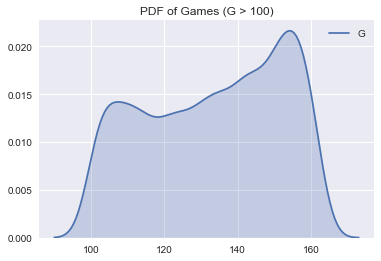

In [124]:
sns.kdeplot(batting_1985_100g.G, shade=True)
plt.title("PDF of Games (G > 100)")
plt.show()

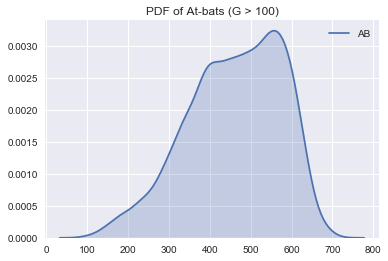

In [123]:
sns.kdeplot(batting_1985_100g.AB, shade=True)
plt.title("PDF of At-bats (G > 100)")
plt.show()

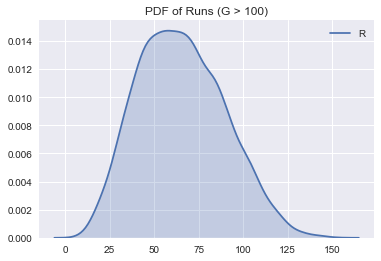

In [125]:
sns.kdeplot(batting_1985_100g.R, shade=True)
plt.title("PDF of Runs (G > 100)")
plt.show()

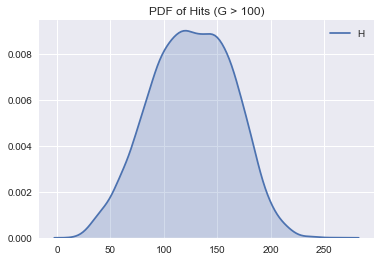

In [126]:
sns.kdeplot(batting_1985_100g.H, shade=True)
plt.title("PDF of Hits (G > 100)")
plt.show()

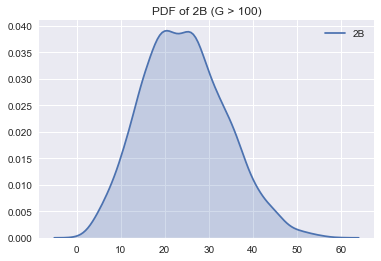

In [128]:
sns.kdeplot(batting_1985_100g['2B'], shade=True)
plt.title("PDF of 2B (G > 100)")
plt.show()

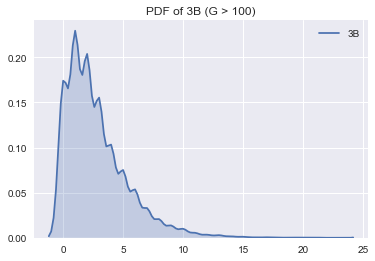

In [129]:
sns.kdeplot(batting_1985_100g['3B'], shade=True)
plt.title("PDF of 3B (G > 100)")
plt.show()

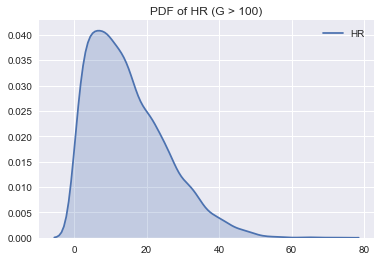

In [130]:
sns.kdeplot(batting_1985_100g.HR, shade=True)
plt.title("PDF of HR (G > 100)")
plt.show()

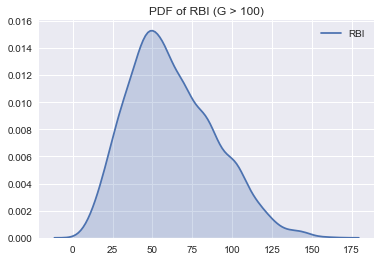

In [131]:
sns.kdeplot(batting_1985_100g.RBI, shade=True)
plt.title("PDF of RBI (G > 100)")
plt.show()

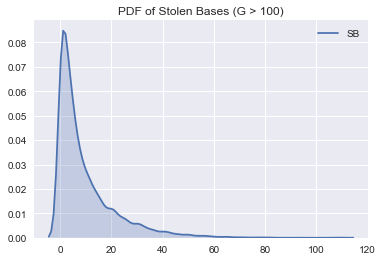

In [134]:
sns.kdeplot(batting_1985_100g.SB, shade=True)
plt.title("PDF of Stolen Bases (G > 100)")
plt.show()

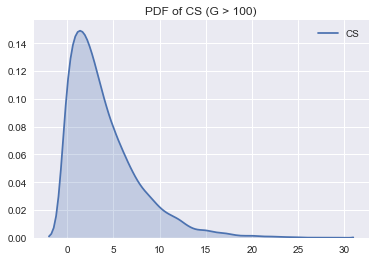

In [133]:
sns.kdeplot(batting_1985_100g.CS, shade=True)
plt.title("PDF of CS (G > 100)")
plt.show()

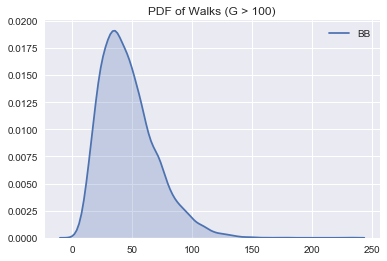

In [135]:
sns.kdeplot(batting_1985_100g.BB, shade=True)
plt.title("PDF of Walks (G > 100)")
plt.show()

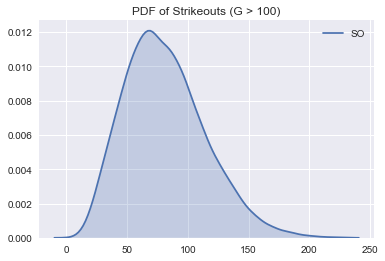

In [136]:
sns.kdeplot(batting_1985_100g.SO, shade=True)
plt.title("PDF of Strikeouts (G > 100)")
plt.show()

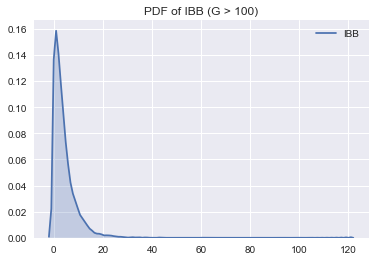

In [137]:
sns.kdeplot(batting_1985_100g.IBB, shade=True)
plt.title("PDF of IBB (G > 100)")
plt.show()

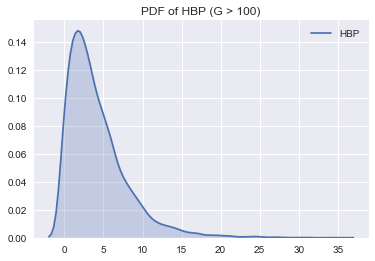

In [138]:
sns.kdeplot(batting_1985_100g.HBP, shade=True)
plt.title("PDF of HBP (G > 100)")
plt.show()

In [9]:
df = pd.merge(salaries, batting_1985_100g)

In [10]:
df.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0


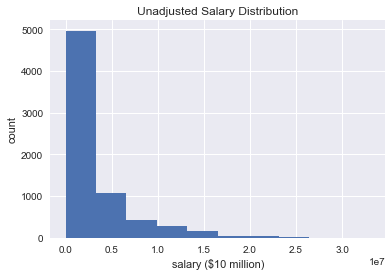

In [11]:
sns.set()
_ = plt.hist(df.salary)
plt.xlabel('salary ($10 million)')
plt.ylabel('count')
plt.title('Unadjusted Salary Distribution')
plt.show()

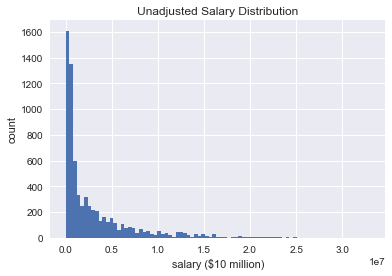

In [12]:
n_data = len(df.salary)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)
_ = plt.hist(df.salary, bins = n_bins)
_ = plt.xlabel('salary ($10 million)')
_ = plt.ylabel('count')
_ = plt.title('Unadjusted Salary Distribution')
plt.show()

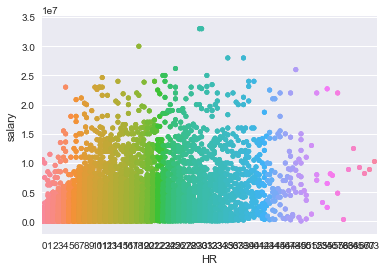

In [15]:
sns.swarmplot(x='HR', y='salary', data = df)
plt.show()

Plot unadjusted salary over time for the years 1985 - 2016.  Unadjusted salary is salary that is not adjusted for inflation, or is in nominal dollars.

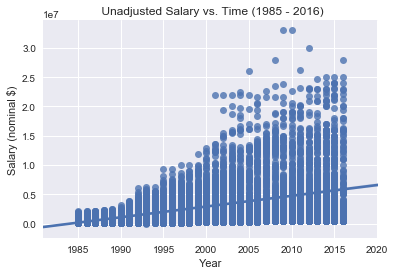

In [16]:
sns.regplot(x='yearID',
            y='salary',
           data=df)
plt.title(' Unadjusted Salary vs. Time (1985 - 2016)')
plt.xlabel('Year')
plt.ylabel('Salary (nominal $)')
plt.show()

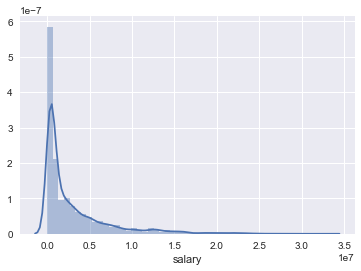

In [17]:
sns.distplot(df.salary)
plt.show()

There are rows that have zeros for the salary.  Remove these observations.  The lowest minimum salary in current year dollars was in 1985.  It was 60,000.  Remove the observations where the salary is less than 60,000.

In [18]:
df_clean1 = df[df.salary !=0]
df_clean2 = df_clean1[df_clean1.salary >= 60000]
df_clean2.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,21.0,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,72.0,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,89.0,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,39.0,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,111.0,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0


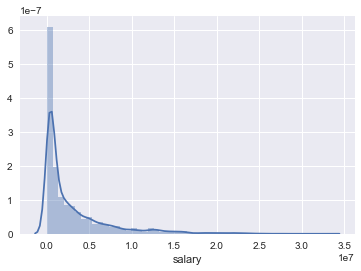

In [19]:
sns.distplot(df_clean2.salary)
plt.show()

Need to adjust salary for inflation.  For ease of interpretation, let's use 2016 dollars.  Use the CPI to calculate this.

In [20]:
cpi = pd.read_csv('CPI.csv')
cpi.head()

,yearID,CPI
0,1985,107.6
1,1986,109.6
2,1987,113.6
3,1988,118.3
4,1989,124.0


Merge the salary data and cpi data by year.  Use the CPI value to adjust salary to 2016 dollars.

In [65]:
salary_adj = pd.merge(df_clean2, cpi, how='left', on='yearID')
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,CPI
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,0.0,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,107.6
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,9.0,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,107.6
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,1.0,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,107.6
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,4.0,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0,107.6
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,10.0,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0,107.6


In [66]:
salary_adj['salary2016'] = (240/salary_adj.CPI)*salary_adj.salary
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,CPI,salary2016
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,0.0,18,22.0,4.0,0.0,0.0,1.0,5.0,107.6,1.784387e+06
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,9.0,44,76.0,4.0,3.0,1.0,2.0,13.0,107.6,5.576208e+05
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,1.0,50,57.0,4.0,1.0,0.0,6.0,18.0,107.6,3.345725e+06
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,3.0,56,54.0,2.0,4.0,7.0,6.0,11.0,107.6,1.014870e+06
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,3.0,90,141.0,15.0,1.0,0.0,5.0,14.0,107.6,3.624535e+06


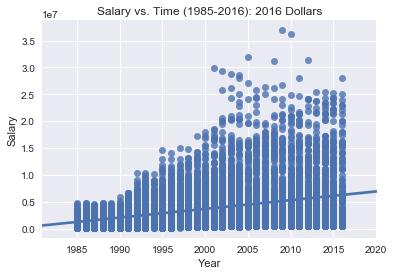

In [67]:
sns.regplot(x='yearID',
            y='salary2016',
            data=salary_adj)
plt.title('Salary vs. Time (1985-2016): 2016 Dollars')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

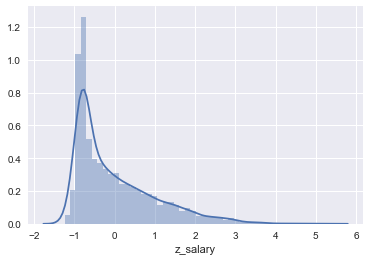

In [68]:
salary_adj['mean_salary'] = salary_adj['salary2016'].groupby(salary_adj['yearID']).transform('mean')
salary_adj['std_salary'] = salary_adj['salary2016'].groupby(salary_adj['yearID']).transform('std')
salary_adj.head()

salary_adj['z_salary'] = (salary_adj.salary2016 - salary_adj.mean_salary)/salary_adj.std_salary
salary_adj.head()

# plot z-scores for salary distribution
sns.distplot(salary_adj.z_salary)
plt.show()

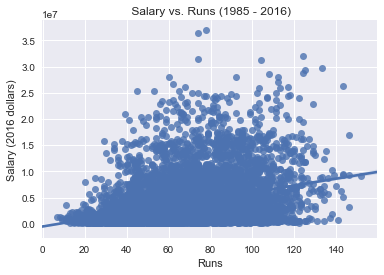

In [69]:
sns.regplot(x='R',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. Runs (1985 - 2016)')
plt.xlabel('Runs')
plt.ylabel('Salary (2016 dollars)')
plt.show()

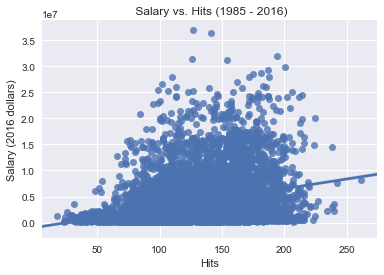

In [70]:
sns.regplot(x='H',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. Hits (1985 - 2016)')
plt.xlabel('Hits')
plt.ylabel('Salary (2016 dollars)')
plt.show()

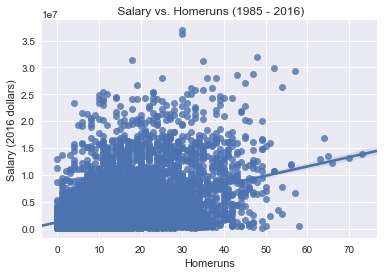

In [71]:
sns.regplot(x='HR',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. Homeruns (1985 - 2016)')
plt.xlabel('Homeruns')
plt.ylabel('Salary (2016 dollars)')
plt.show()

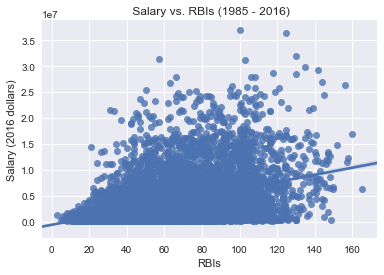

In [72]:
sns.regplot(x='RBI',
            y='salary2016',
           data=salary_adj)
plt.title(' Salary vs. RBIs (1985 - 2016)')
plt.xlabel('RBIs')
plt.ylabel('Salary (2016 dollars)')
plt.show()

## Regression Models

In [75]:
salary_adj = pd.DataFrame(salary_adj)
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,HBP,SH,SF,GIDP,CPI,salary2016,mean_salary,std_salary,z_salary,AVG
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,0.0,0.0,1.0,5.0,107.6,1.784387e+06,1.261677e+06,913318.087782,0.572319,0.235294
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,3.0,1.0,2.0,13.0,107.6,5.576208e+05,1.261677e+06,913318.087782,-0.770877,0.264228
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,1.0,0.0,6.0,18.0,107.6,3.345725e+06,1.261677e+06,913318.087782,2.281842,0.267081
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,4.0,7.0,6.0,11.0,107.6,1.014870e+06,1.261677e+06,913318.087782,-0.270231,0.232346
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,1.0,0.0,5.0,14.0,107.6,3.624535e+06,1.261677e+06,913318.087782,2.587114,0.300325


Create a batting average feature, which is simply the number hits a player has divided by the number of at-bats.  Also, create the log of salary.

In [79]:
salary_adj['AVG'] = salary_adj.H / salary_adj.AB *1000
salary_adj['log_salary2016'] = np.log(salary_adj['salary2016'])
salary_adj.head()

,yearID,teamID,lgID,playerID,salary,stint,G,AB,R,H,...,SH,SF,GIDP,CPI,salary2016,mean_salary,std_salary,z_salary,AVG,log_salary2016
0,1985,ATL,NL,chambch01,800000,1,101,170,16,40,...,0.0,1.0,5.0,107.6,1.784387e+06,1.261677e+06,913318.087782,0.572319,235.294118,14.394585
1,1985,ATL,NL,harpete01,250000,1,138,492,58,130,...,1.0,2.0,13.0,107.6,5.576208e+05,1.261677e+06,913318.087782,-0.770877,264.227642,13.231434
2,1985,ATL,NL,hornebo01,1500000,1,130,483,61,129,...,0.0,6.0,18.0,107.6,3.345725e+06,1.261677e+06,913318.087782,2.281842,267.080745,15.023194
3,1985,ATL,NL,hubbagl01,455000,1,142,439,51,102,...,7.0,6.0,11.0,107.6,1.014870e+06,1.261677e+06,913318.087782,-0.270231,232.346241,13.830271
4,1985,ATL,NL,murphda05,1625000,1,162,616,118,185,...,0.0,5.0,14.0,107.6,3.624535e+06,1.261677e+06,913318.087782,2.587114,300.324675,15.103237


In [97]:
y = salary_adj.log_salary2016
x = salary_adj[['HR', 'R', 'RBI', 'AVG']]

Create the training and test splits.

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [99]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [100]:
predictions = lm.predict(X_test)

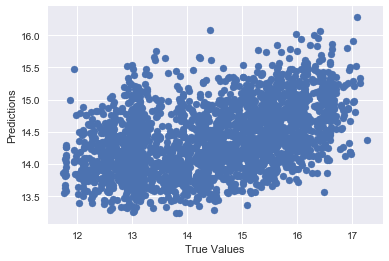

In [101]:
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [102]:
print("Score:", model.score(X_test, y_test))

Score: 0.184522970537


In [103]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_salary2016   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 7.413e+04
Date:                Fri, 04 May 2018   Prob (F-statistic):               0.00
Time:                        14:20:23   Log-Likelihood:                -9441.4
No. Observations:                4700   AIC:                         1.889e+04
Df Residuals:                    4696   BIC:                         1.892e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0499      0.005      9.563      0.000       0.040       0.060
R             -0.0127      0.002     -7.571      0.000      -0.016      -0.009
RBI           -0.0050      0.002     -2.153      0.031      -0.010      -0.000
AVG            0.0539      0.000    148.836      0.000       0.053       0.055
==============================================================================
Omnibus:                        6.013   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                5.844
Skew:                          -0.064   Prob(JB):                       0.0538
Kurtosis:                       2.884   Cond. No.                         61.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
model_test = sm.OLS(y_test, X_test).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_salary2016   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.627e+04
Date:                Fri, 04 May 2018   Prob (F-statistic):               0.00
Time:                        14:20:52   Log-Likelihood:                -4654.6
No. Observations:                2316   AIC:                             9317.
Df Residuals:                    2312   BIC:                             9340.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HR             0.0526      0.007      7.209      0.000       0.038       0.067
R             -0.0119      0.002     -4.942      0.000      -0.017      -0.007
RBI           -0.0031      0.003     -0.939      0.348      -0.009       0.003
AVG            0.0534      0.001    103.762      0.000       0.052       0.054
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.107
Skew:                          -0.017   Prob(JB):                        0.948
Kurtosis:                       3.004   Cond. No.                         59.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""